# Aplikasi Logika Fuzzy Pada Sistem Pakar Pariwisata
NIM 09011381722118

NAMA TATA SATRIA TIMOR PERDANA

KELAS SK 5 BUKIT

Sistem ini dapat membantu para calon wisatawan dalam menentukan tujuan wisata. faktor faktor penentu yang menjadi masukan sitem adalah total dana(budget), jarak dan lama perjalanan 


In [19]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt 

# Fuzzyfikasi

In [20]:
budget = ctrl.Antecedent(np.arange(0, 15, 1),'budget')
jarak = ctrl.Antecedent(np.arange(0, 3100, 1),'jarak')
durasi = ctrl.Antecedent(np.arange(0, 7, 1),'durasi')

# Data yang dipakai di dalam penelitian ini yaitu ;

1. data budget = total harga tiket masuk objek wisata berdasarkan jumlah durasi(lama) wisata
2. data jarak = data jarak tempuh
3. data durasi = lama wisata yang dimasukkan pengguna
    
   ketiga hal diatas sebagai input


In [21]:
budget['kecil'] = fuzz.trapmf(budget.universe,[0, 0, 2, 5])
budget['sedang'] = fuzz.trimf(budget.universe,[4, 7, 10])
budget['besar'] = fuzz.trapmf(budget.universe,[9, 12, 15, 15])

# Fungsi data keanggotaan budget ;
1. kecil (0-5 juta)
2. sedang (4-10 juta)
3. besar (9-15 juta)

\begin{equation}
  budget['kecil'] = \mu kecil(x)=\begin{cases}
    1, & \text{$0\leq x\leq2$}.\\
    (5 - x)/(5 - 2) , & \text{$2 \leq x \leq 5$}.\\
    0, & \text{$x\geq 5 $ }.\
  \end{cases}
  \\
  budget['sedang'] = \mu sedang(x)=\begin{cases}
    0, & \text{$x\leq 4$ atau $x\geq10$}. \\
    (x - 4)/(7 - 4) , & \text{$4 \leq x \leq 7$}.\\
    (10 - x)/(10 - 7) , & \text{$7 \leq x \leq 10$}.\\
  \end{cases}
  \\
  budget['besar'] = \mu besar(x)=\begin{cases}
    0, & \text{$9\leq x\leq12$}.\\
    (15 - x)/(15 - 12) , & \text{$12 \leq x \leq 15$}.\\
    1, & \text{$x\geq 15 $ }.\\
  \end{cases}
\end{equation}

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


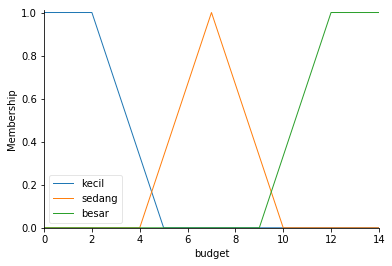

In [22]:
budget.view()

In [27]:
jarak['dekat'] = fuzz.trapmf(jarak.universe, [0, 0, 1100, 2200])
jarak['jauh'] = fuzz.trapmf(jarak.universe, [2000, 2550, 3100, 3100])

# Fungsi data keanggotaan jarak ;
1. dekat (0-2200 km)
2. jauh (2000-3100 km)

\begin{equation}
   jarak['dekat'] = \mu dekat(x)=\begin{cases}
    1, & \text{$0\leq x\leq1100$}.\\
    (2200 - x)/(2200 - 1100) , & \text{$1100 \leq x \leq 2200$}.\\
    0, & \text{$x\geq 2200 $ }.\\
  \end{cases}
  \\
 Pekerjaan['jauh'] = \mu jauh(x)=\begin{cases}
    0, & \text{$2000\leq x\leq2200$}.\\
    (3100 - x)/(3100 - 2200) , & \text{$2200 \leq x \leq 3100$}.\\
    1, & \text{$x\geq 3100 $ }.\\
   \end{cases}
\end{equation}

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


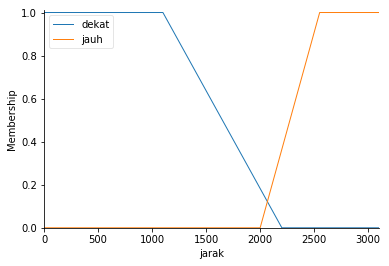

In [28]:
jarak.view()

In [29]:
durasi['sebentar'] = fuzz.trapmf(durasi.universe, [0, 0, 2, 4])
durasi['lama'] = fuzz.trapmf(durasi.universe, [3, 5, 7, 7])


# Fungsi data keanggotaan durasi ;
1. sebentar (0-4 hari)
2. lama (3-7 hari)

\begin{equation}
   durasi['sebentar'] = \mu sebentar(x)=\begin{cases}
    1, & \text{$0\leq x\leq2$}.\\
    (4 - x)/(4 - 2) , & \text{$2 \leq x \leq 4$}.\\
    0, & \text{$x\geq 4 $ }.\\
  \end{cases}
  \\
    durasi['lama'] = \mu lama(x)=\begin{cases}
    0, & \text{$3\leq x\leq7$}.\checkmark\\
    (7 - x)/(7 - 5) , & \text{$5 \leq x \leq 7$}.\\
    1, & \text{$x\geq 7 $ }.\\
  \end{cases}
\end{equation}

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


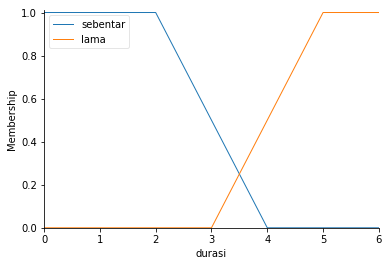

In [30]:
durasi.view()

In [31]:
kondisi = ctrl.Consequent(np.arange(0, 126, 1),'kondisi')

kondisi sebagai output

In [32]:
kondisi['tidak memungkinkan'] = fuzz.trimf(kondisi.universe,[0, 0, 50])
kondisi['kurang memungkinkan'] = fuzz.trimf(kondisi.universe,[25, 50, 125])
kondisi['memungkinkan'] = fuzz.trimf(kondisi.universe,[50, 125, 125])

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


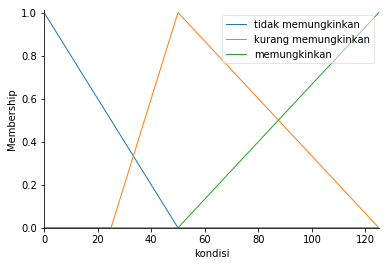

In [33]:
kondisi.view()

# Inferencing
Pada tahap inferencing, membuat aturan-aturan fuzzy yang dinyatakan dalam bentuk IF .... THEN ....

1. IF Budget KECIL dan Jarak DEKAT dan Durasi SEBENTAR THEN Kondisi MEMUNGKINKAN
2. IF Budget KECIL dan Jarak DEKAT dan Durasi LAMA THEN Kondisi KURANG MEMUNGKINKAN
3. IF Budget KECIL dan Jarak JAUH dan Durasi SEBENTAR THEN Kondisi TIDAK MEMUNGKINKAN
4. IF Budget KECIL dan Jarak JAUH dan Durasi LAMA THEN Kondisi TIDAK MEMUNGKINKAN

5. IF Budget SEDANG dan Jarak DEKAT dan Durasi SEBENTAR THEN Kondisi MEMUNGKINKAN
6. IF Budget SEDANG dan Jarak DEKAT dan Durasi LAMA THEN Kondisi MEMUNGKINKAN
7. IF Budget SEDANG dan Jarak JAUH dan Durasi SEBENTAR THEN Kondisi KURANG MEMUNGKINKAN
8. IF Budget SEDANG dan Jarak JAUH dan Durasi LAMA THEN Kondisi TIDAK MEMUNGKINKAN

9. IF Budget BESAR dan Jarak DEKAT dan Durasi SEBENTAR THEN Kondisi MEMUNGKINKAN
10. IF Budget BESAR dan Jarak DEKAT dan Durasi LAMA THEN Kondisi MEMUNGKINKAN
11. IF Budget BESAR dan Jarak JAUH dan Durasi SEBENTAR THEN Kondisi MEMUNGKINKAN
12. IF Budget BESAR dan Jarak JAUH dan Durasi LAMA THEN Kondisi MEMUNGKINKAN

|Rule|budget|jarak|durasi|kondisi|
|----|----|----|----|----|----|----|----|
|rule1|Kecil|Dekat|sebentar|memungkinkan|
|rule2|kecil|dekat| lama| kurang memungkinkan|
|rule3|kecil| jauh| sebentar| tidak memungkinkan|
|rule4| kecil| jauh| lama| tidak memungkinkan| 
|rule5| sedang| dekat| sebentar| memungkinkan|
|rule6| sedang|dekat| lama| memungkinkan|
|rule7| sedang| jauh| sebentar| kurang memungkinkan|
|rule8| sedang| jauh| lama| tidak memungkinkan|
|rule9| besar| dekat| sebentar| memungkinkan|
|rule10| besar| dekat| lama| memungkinkan|
|rule11| besar| jauh| sebentar| memungkinkan| 
|rule12| besar| jauh| lama| memungkinkan|

# Rule  base 

In [34]:
rule1 = ctrl.Rule(budget['kecil'] & jarak['dekat'] & durasi['sebentar'], kondisi['memungkinkan'])
rule2 = ctrl.Rule(budget['kecil'] & jarak['dekat'] & durasi['lama'], kondisi['kurang memungkinkan'])
rule3 = ctrl.Rule(budget['kecil'] & jarak['jauh'] & durasi['sebentar'], kondisi['tidak memungkinkan'])
rule4 = ctrl.Rule(budget['kecil'] & jarak['jauh'] & durasi['lama'], kondisi['tidak memungkinkan'])
rule5 = ctrl.Rule(budget['sedang'] & jarak['dekat'] & durasi['sebentar'], kondisi['memungkinkan'])
rule6 = ctrl.Rule(budget['sedang'] & jarak['dekat'] & durasi['lama'], kondisi['memungkinkan'])
rule7 = ctrl.Rule(budget['sedang'] & jarak['jauh'] & durasi['sebentar'], kondisi['kurang memungkinkan'])
rule8 = ctrl.Rule(budget['sedang'] & jarak['jauh'] & durasi['lama'], kondisi['tidak memungkinkan'])
rule9 = ctrl.Rule(budget['besar'] & jarak['dekat'] & durasi['sebentar'], kondisi['memungkinkan'])
rule10 = ctrl.Rule(budget['besar'] & jarak['dekat'] & durasi['lama'], kondisi['memungkinkan'])
rule11 = ctrl.Rule(budget['besar'] & jarak['jauh'] & durasi['sebentar'], kondisi['memungkinkan'])
rule12 = ctrl.Rule(budget['besar'] & jarak['jauh'] & durasi['lama'], kondisi['memungkinkan'])

# DEFUZZYFIKASI

In [35]:
kondisi_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])

97.57575757575755


C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


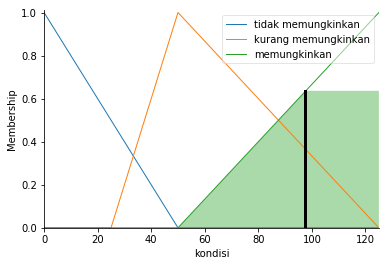

In [36]:
braking = ctrl.ControlSystemSimulation(kondisi_ctrl)

braking.input['budget'] = 6
braking.input['jarak'] = 1500
braking.input['durasi'] = 5
braking.compute()

print(braking.output['kondisi'])

kondisi.view(sim=braking)


# Perhitungan Manual
\begin{equation}
    budget = 6 \\
  budget['kecil'] = \mu kecil(x)=\begin{cases}
    1, & \text{$0\leq x\leq2$}.\\
    (5 - x)/(5 - 2) , & \text{$2 \leq x \leq 5$}.\\
    0, & \text{$x\geq 5 $ }.\checkmark
  \end{cases}
  \\
  budget['sedang'] = \mu sedang(x)=\begin{cases}
    0, & \text{$x\leq 4$ atau $x\geq10$}. \checkmark \\
    (x - 4)/(7 - 4) , & \text{$4 \leq x \leq 7$}.\checkmark\\
    (10 - x)/(10 - 7) , & \text{$7 \leq x \leq 10$}.\\
  \end{cases}
  \\
  budget['besar'] = \mu besar(x)=\begin{cases}
    0, & \text{$9\leq x\leq12$}.\\
    (15 - x)/(15 - 12) , & \text{$12 \leq x \leq 15$}.\\
    1, & \text{$x\geq 15 $ }.\\
  \end{cases}
\end{equation}

   

\begin{equation}
    \mu sedang(6) = (6 - 4)/ (7 - 4) \\
    \mu sedang(6) = 2/3 \\ 
    \mu sedang(6) = 0.667 \\   
\end{equation}

\begin{equation}
    jarak = 1500 \\
   jarak['dekat'] = \mu dekat(x)=\begin{cases}
    1, & \text{$0\leq x\leq1100$}.\\
    (2200 - x)/(2200 - 1100) , & \text{$1100 \leq x \leq 2200$}.\checkmark\\
    0, & \text{$x\geq 2200 $ }.\\
  \end{cases}
  \\
 Pekerjaan['jauh'] = \mu jauh(x)=\begin{cases}
    0, & \text{$2000\leq x\leq2200$}.\\
    (3100 - x)/(3100 - 2200) , & \text{$2200 \leq x \leq 3100$}.\\
    1, & \text{$x\geq 3100 $ }.\\
   \end{cases}
\end{equation}

\begin{equation}
    \mu dekat(1500) = (2200 - 1500) / (2200 - 2000) \\
    \mu dekat(1500) = 700/200 \\ 
    \mu dekat(1500) = 3.5 \\
\end{equation}

\begin{equation}
    durasi = 5 \\
   durasi['sebentar'] = \mu sebentar(x)=\begin{cases}
    1, & \text{$0\leq x\leq2$}.\\
    (4 - x)/(4 - 2) , & \text{$2 \leq x \leq 4$}.\checkmark\\
    0, & \text{$x\geq 4 $ }.\\
  \end{cases}
  \\
    durasi['lama'] = \mu lama(x)=\begin{cases}
    0, & \text{$3\leq x\leq7$}.\checkmark\\
    (7 - x)/(7 - 5) , & \text{$5 \leq x \leq 7$}.\checkmark\\
    1, & \text{$x\geq 7 $ }.\\
  \end{cases}
\end{equation}

\begin{equation}
    \mu sebentar(5) = (4 - 5) / (4 - 2) \\
    \mu sebentar(5) = -1/2 \\ 
    \mu sebentar(5) = -0.5 \\
    \mu lama(5) = (7 - 5) / (7 - 5) \\
    \mu lama(5) = 2/2 \\
    \mu lama(5) = 1 \\
\end{equation} 

Lalu kita cari nilai z untuk setiap aturan dengan menggunakan fungsi MIN karena menggunakan rule AND

1 IF Budget KECIL AND Jarak DEKAT AND Durasi SEBENTAR THEN Kondisi MEMUNGKINKAN

$$ \\ \alpha(predikat_1) = \mu BudgetKecil \cap \mu JarakDekat \cap \mu DurasiSebentar $$
$$\alpha(predikat_1)   = min (\mu BudgetKecil[6], \mu JarakDekat[1500], \mu DurasiSebentar[5]) $$
$$ \alpha(predikat_1) = min (0; 3.5; -0.5) $$
$$ \alpha(predikat_1) = 0 $$

Lalu lihat himpunan Kondisi MEMUNGKINKAN 
$$
   kondisi['memungkinkan'] = \mu(x)=\begin{cases}
    0, & \text{$x\leq 50$ atau $x\geq125$}.\\
    \left.(x - 50)\, \right/(125 - 50) , & \text{$50 \leq x \leq 125$}.\\
    \left.(125 - x)\, \right/(125 - 125) , & \text{$125 \leq x \leq 125$}.\\
  \end{cases}
 $$
Maka nilai $ Z_1 = 0 $


2 IF Budget KECIL AND Jarak DEKAT AND Durasi LAMA THEN Kondisi KURANG MEMUNGKINKAN

$$ \\ \alpha(predikat_2) = \mu BudgetKecil \cap \mu JarakDekat \cap \mu DurasiLama $$
$$\alpha(predikat_2)   = min (\mu Budgetkecil[6], \mu JarakDekat[1500], \mu DurasiLama[5]) $$
$$ \alpha(predikat_2) = min (0; 3.5; 1 ) $$
$$ \alpha(predikat_2) = 0 $$

Lalu lihat himpunan kondisi KURANG MEMUNGKINKAN 
$$
   Kondisi['kurang memungkinkan'] = \mu(x)=\begin{cases}
    0, & \text{$x\leq 25$ atau $x\geq125$}.\\
    \left.(x - 25)\, \right/(50 - 25) , & \text{$25 \leq x \leq 50$}.\\
    \left.(125 - x)\, \right/(125 - 50) , & \text{$50 \leq x \leq 125$}.\\
  \end{cases}
$$

Maka nilai $ Z_2 = 0 $


3 IF Budget KECIL AND Jarak JAUH AND Durasi SEBENTAR THEN Kondisi TIDAK MEMUNGKINKAN

$$ \\ \alpha(predikat_3) = \mu BudgetKecil \cap \mu JarakJauh \cap \mu Durasi SEBENTAR $$
$$\alpha(predikat_3)   = min (\mu BudgetKecil[6], \mu JarakJauh[1500], \mu DurasiSebentar[5]) $$
$$ \alpha(predikat_3) = min (0; 0; -0.5) $$
$$ \alpha(predikat_3) = 0 $$

Lalu lihat himpunan kondisi tidak memungkinkan
$$
  \\
   kondisi['Tidak Memungkinkan'] = \mu(x)=\begin{cases}
    0, & \text{$x\leq 11$ atau $x\geq15$}.\\
    \left.(x - 50)\, \right/(0 - 0) , & \text{$50 \leq x \leq 50$}.\\
    \left.(50 - x)\, \right/(50 - 0) , & \text{$50 \leq x \leq 50$}.\\
  \end{cases}
  \\
$$

Maka nilai $ Z_3 = 0 $

4 IF Budget KECIL AND Jarak JAUH AND Durasi LAMA THEN Kondisi TIDAK MEMUNGKINKAN

$$ \\ \alpha(predikat_4) = \mu BudgetKecil \cap \mu JarakJauh \cap \mu DurasiLama$$
$$\alpha(predikat_4)   = min (\mu BudgetKecil[6], \mu JarakJauh[1500], \mu DurasiLama[5]) $$
$$ \alpha(predikat_4) = min (0; 0; 1) $$
$$ \alpha(predikat_4) = 0 $$

Lalu lihat himpunan KOndisi Memungkinkan
$$ kondisi['memungkinkan'] = \mu(x)=\begin{cases}
    0, & \text{$x \leq 50$}.\\
    \left.(x - 50) \,  \right/(125 - 50) , & \text{$50 \leq x \leq 125$}.\\
    1, & \text{$x\geq 125$}.
  \end{cases}
$$

Maka nilai $ Z_4 = 0 $


5 IF budget SEDANG AND jarak DEKAT AND Durasi SEBENTAR THEN kondisi MEMUNGKINKAN

$$ \\ \alpha(predikat_5) = \mu budgetsedang \cap \mu jarakdekat \cap \mu durasisebentar $$
$$\alpha(predikat_5)   = min (\mu budgetsedang[6], \mu jarakdekat[1500], \mu durasisebentar[5]) $$
$$ \alpha(predikat_5) = min (0.667; 3.5; -0.5) $$
$$ \alpha(predikat_5) = -1.167 $$

Lalu lihat himpunan kondisi memungkinkan
$$
    kondisi['memungkinkan'] = \mu(x)=\begin{cases}
    0, & \text{$x\leq 3$ atau $x\geq8$}.\\
    \left.(x - 50)\, \right/(125 - 50) , & \text{$50 \leq x \leq 125$}.\\
    \left.(125 - x)\, \right/(125 - 125) , & \text{$125 \leq x \leq 125$}.\\
  \end{cases}
$$

Maka nilai keanggotaan yang memenuhi adalah -1.167
Maka nilai Z$_5$ = -1.167
Terdapat 1 nilai keanggotaan yang akan kita masukkan nilainya

$$
(x-50) / (125-50) = -1.167 \\
(x-50) = -64.2 \\ 
x = -14.2 \\
$$

Maka nilai Z$_5$ = -14.2


6 IF Budget sedang dan Jarak dekat dan  Durasi lama THEN Kondisi memungkinkan

$$ \\ \alpha(predikat_6) = \mu Budgetsedang \cap \mu jarakdekat \cap \mu durasilama $$
$$\alpha(predikat_6)   = min (\mu budgetsedang[6], \mu jarakdekat[1500], \mu durasilama[5]) $$
$$ \alpha(predikat_6) = min (0.667; 3.5; 1) $$
$$ \alpha(predikat_6) = 2.33 $$

Lalu lihat himpunan Durasi Cepat
$$
    kondisi['memungkinkan'] = \mu(x)=\begin{cases}
    0, & \text{$x\leq 50$ atau $x\geq125$}.\\
    \left.(x - 50)\, \right/(125 - 50) , & \text{$50 \leq x \leq 125$}.\\
    \left.(125 - x)\, \right/(125 - 125) , & \text{$125 \leq x \leq 125$}.\\
  \end{cases}
$$

Maka nilai keanggotaan yang memenuhi adalah 2.33
Terdapat 1 nilai keanggotaan yang akan kita masukkan nilainya

$$
(x-50) / (125-50) = 2.33 \\
(x-50) = 32.1 \\ 
x = 82.1 \\
$$

Maka nilai Z$_6$ = 82.1


7 IF Budget SEDANG AND Jarak JAUH AND Durasi SEBENTAR THEN Kondisi KURANG MEMUNGKINKAN
$$ \\ \alpha(predikat_7) = \mu budgetsedang \cap \mu jarakjauh \cap \mu durasissebentar $$
$$\alpha(predikat_7)   = min (\mu BudgetSedang[6], \mu JarakJauh[1500], \mu DurasisSebentar[5]) $$
$$ \alpha(predikat_7) = min (0.667; 0; 1) $$
$$ \alpha(predikat_7) = 0 $$

Lalu lihat himpunan Kondisi KURANG MEMUNGKINKAN

$$
   kondisi['kurang memungkinkan'] = \mu(x)=\begin{cases}
    0, & \text{$x\leq 7$ atau $x\geq12$}.\\
    \left.(x - 25)\, \right/(50 - 25) , & \text{$25 \leq x \leq 50$}.\\
    \left.(125 - x)\, \right/(125 - 50) , & \text{$50 \leq x \leq 125$}.\\
  \end{cases}
$$

Maka nilai keanggotaan yang memenuhi adalah 0
Maka nilai Z$_7$ = 0

8 IF Budget SEDANG dan Jarak JAUH AND Durasi LAMA THEN Kondisi TIDAK MEMUNGKINKAN
$$ \\ \alpha(predikat_8) = \mu Budgetsedang \cap \mu jarakjauh \cap \mu DurasiLama $$
$$\alpha(predikat_8)   = min (\mu BudgetSedang[6], \mu JarakJauh[1500], DurasiLama[5]) $$
$$ \alpha(predikat_8) = min (0.667; 0; 1) $$
$$ \alpha(predikat_8) = 0 $$

Lalu lihat himpunan Kondisi TIDAK MEMUNGKINKAN
$$
  \\
   kondisi['tidak memungkinkan'] = \mu(x)=\begin{cases}
    0, & \text{$x\leq 0$ atau $x\geq50$}.\\
    \left.(x - 0)\, \right/(50 - 0) , & \text{$0 \leq x \leq 0$}.\\
    \left.(50 - x)\, \right/(50 - 0) , & \text{$0 \leq x \leq 50$}.\\
  \end{cases}
  \\
$$

Maka nilai keanggotaan yang memenuhi adalah 0
Maka nilai Z$_8$ = 0

9 IF Budget BESAR AND Jarak DEKAT AND Durasi SEBENTAR THEN Kondisi MEMUNGKINKAN
$$ \\ \alpha(predikat_9) = \mu BudgetBesar \cap \mu JarakDekat \cap \mu DurasiSebentar $$
$$\alpha(predikat_9)   = min (\mu Budgetbesar[6], \mu Jarakdekat[1500], \mu Durasisebentar[5]) $$
$$ \alpha(predikat_9) = min (0; 3.5; -0.5) $$
$$ \alpha(predikat_9) = 0 $$

Lalu lihat himpunan Kondisi MEMUNGKINKAN
$$ Kondisi['MEMUNGKINKAN'] = \mu(x)=\begin{cases}
    1, & \text{$50\leq x \leq 125$}.\\
    \left.(125 - x) \,  \right/(125 - 50) , & \text{$50 \leq x \leq 125$}.\\
    0, & \text{$x\geq 125$}.
  \end{cases}
  \\
$$

Maka nilai keanggotaan yang memenuhi adalah 0
Maka nilai Z$_9$ = 0

10 IF Budget BESAR AND Jarak DEKAT AND durasi LAMA THEN Kondisi MEMUNGKINKAN
$$ \\ \alpha(predikat_1\,_0) = \mu budgetbesar \cap \mu jarakdekat \cap \mu durasilama $$
$$\alpha(predikat_1\,_0)   = min (\mu budgetbesar[6], \mu jarakdekat[1500], \mu durasilama[5]) $$
$$ \alpha(predikat_1\,_0) = min (0; 3.5; 1) $$
$$ \alpha(predikat_1\,_0) = 0 $$

Lalu lihat himpunan Durasi Cepat
$$
    kondisi['MUNGKINKAN'] = \mu(x)=\begin{cases}
    0, & \text{$x\leq 50$ atau $x\geq125$}.\\
    \left.(x - 50)\, \right/(125 - 50) , & \text{$50 \leq x \leq 125$}.\\
    \left.(125 - x)\, \right/(125 - 50) , & \text{$50 \leq x \leq 125$}.\\
  \end{cases}
$$

Maka nilai keanggotaan yang memenuhi adalah 0
Maka nilai Z$_1$$_0$ = 0

11 IF Budget BESAR dan Jarak JAUH AND Durasi SEBENTAR THEN Kondisi MEMUNGKINKAN
$$ \\ \alpha(predikat_1\,_1) = \mu BudgetBesar \cap \mu JarakJauh \cap \mu DurasiSebentar $$
$$\alpha(predikat_1\,_1)   = min (\mu BudgetBesar[6], \mu jarakjauh[1500], \mu DurasiSebentar[5]) $$
$$ \alpha(predikat_1\,_1) = min (0; 0; -0.5) $$
$$ \alpha(predikat_1\,_1) = 0 $$

Lalu lihat himpunan Kondisi Memungkinkan
$$
    Kondisi['Memungkinkan'] = \mu(x)=\begin{cases}
    0, & \text{$x\leq 50$ atau $x\geq125$}.\\
    \left.(x - 50)\, \right/(125 - 50) , & \text{$50 \leq x \leq 125$}.\\
    \left.(125 - x)\, \right/(125 - 50) , & \text{$50 \leq x \leq 125$}.\\
  \end{cases}
$$

Maka nilai keanggotaan yang memenuhi adalah 0
Maka nilai Z$_1$$_1$ = 0

12 IF Budget BESAR AND Jarak JAUH AND Durasi LAMA THEN Kondisi MEMUNGKINNKAN
$$ \\ \alpha(predikat_1\,_2) = \mu BudgetBesar \cap \mu JarakJauh \cap \mu DurasiLama  $$
$$\alpha(predikat_1\,_2)   = min (\mu BudgetBesar[5], \mu JarakJauh[1500], \mu DuraiLama[5]) $$
$$ \alpha(predikat_1\,_2) = min (0; 0; 1) $$
$$ \alpha(predikat_1\,_2) = 0 $$

Lalu lihat himpunan Kondisi memungkinkan
$$
    Kondisi['Memungkinkan'] = \mu(x)=\begin{cases}
    0, & \text{$x\leq 50$ atau $x\geq125$}.\\
    \left.(x - 50)\, \right/(125 - 50) , & \text{$50 \leq x \leq 125$}.\\
    \left.(125 - x)\, \right/(125 - 50) , & \text{$50 \leq x \leq 125$}.\\
  \end{cases}
$$

Maka nilai keanggotaan yang memenuhi adalah 0
Maka nilai Z$_1$$_2$ = 0

Dari sini kita dapat mencari nilai z, yaitu :

Z =$$ \frac{\alpha predikat_1 \times Z_1 +
\alpha predikat_2 \times Z_2 +
\alpha predikat_3 \times Z_3 +
\alpha predikat_4 \times Z_4 +
\alpha predikat_5 \times Z_5 +
\alpha predikat_6 \times Z_6 +
\alpha predikat_7 \times Z_7 +
\alpha predikat_8 \times Z_8 +
\alpha predikat_9 \times Z_9 +
\alpha predikat_1\,_0 \times Z_1\,_1 +
\alpha predikat_1\,_1 \times Z_1\,_2 +
\alpha predikat_1\,_2 \times Z_1\,_2 +}
{\alpha predikat_1 + \alpha predikat_2 +
\alpha predikat_3 + \alpha predikat_4 +
\alpha predikat_5 + \alpha predikat_6 +
\alpha predikat_7 + \alpha predikat_8 +
\alpha predikat_9 + \alpha predikat_1\,_0 +
\alpha predikat_1\,_1 + \alpha predikat_1\,_2}$$

$$Z = \frac{0 + 0 + 0 + 0 + -1,167 \times 14,2 + 2.33 \times 82.1 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0}{0 + 0 + 0 + 0 + -1,167 + 2.33 + 0 + 0 + 0 +0 +0 +0} $$
 
 $$ Z = \frac{-16.5 + 191.2}{1.63} $$
 $$ Z = 107,17 \,  $$

Hasil output Kondisi yang dikeluarkan menggunakan code python sebesar 97,57% sedangkan perhitungan manual kondisi sebesar 107,17%. Terdapat perbedaan kondisi sebesar 9,6%